In [ ]:
pip install -U scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 18.8 MB/s 


In [ ]:
from skmultiflow.data import AGRAWALGenerator
from skmultiflow.meta import StreamingRandomPatchesClassifier
import matplotlib.pyplot as plt
stream = AGRAWALGenerator(random_state=1)


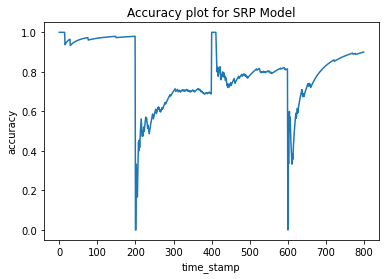

In [ ]:
# Variables to control loop and track performance
srp = StreamingRandomPatchesClassifier(random_state=1,n_estimators=10)
n_samples = 0
correct_cnt = 0
max_samples = 800
acc=[]
time=0
num=0
# Run test-then-train loop for max_samples
# or while there is data in the stream
while n_samples < max_samples and stream.has_more_samples():
    if(n_samples%200==0):
      stream.generate_drift()
      correct_cnt=0
      num=0
    X, y = stream.next_sample()
    y_pred = srp.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    srp.partial_fit(X, y)
    time +=1
    n_samples+=1
    num+=1
    acc.append(correct_cnt/num)
# Plotting the accuracy after introducing drift
plt.plot(range(time),acc)
plt.xlabel('time_stamp')
plt.ylabel('accuracy')
plt.title('Accuracy plot for SRP Model')
plt.show()

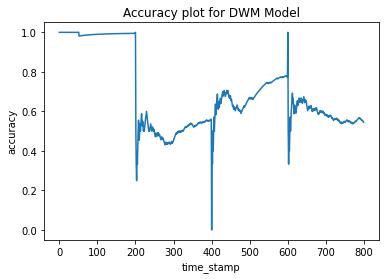

In [ ]:
from skmultiflow.meta import DynamicWeightedMajorityClassifier
dwm = DynamicWeightedMajorityClassifier(period=1)
# Variables to control loop and track performance
n_samples = 0
correct_cnt = 0
max_samples = 800
acc=[]
time=0
num=0
# Run test-then-train loop for max_samples
# or while there is data in the stream
while n_samples < max_samples and stream.has_more_samples():
    if(n_samples%200==0):
      stream.generate_drift()
      correct_cnt=0
      num=0
    X, y = stream.next_sample()
    y_pred = dwm.predict(X)
    if y[0] == y_pred[0]:
        correct_cnt += 1
    dwm.partial_fit(X, y)
    time +=1
    n_samples+=1
    num +=1
    acc.append(correct_cnt/num)
# Plotting the accuracy after introducing drift
plt.plot(range(time),acc)
plt.xlabel('time_stamp')
plt.ylabel('accuracy')
plt.title('Accuracy plot for DWM Model')
plt.show()

In [ ]:
len(acc)

800

### Observation and Comments:-
1. After every 200 samples, concept drift is introduced. It is introduced by changing the function randomly.
2. We can see the sudden change in accuracy around 200,400,600 due to the same reason.
3. SRP is performing better here as it is giving better accuracy as well as it is adapting quickly to the drift.

### AGRAWAL Generator Insights:-
1. The generator produces a stream containing nine features, six numeric and three categorical. 
2. There are ten functions defined for generating binary class labels from the features.
3. On calling the generate_drift method one of these functions is selected randomly.